In [90]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [91]:
os.chdir("C:/Users/sadaf.mehdi/Desktop/Data Science/Project 2")

In [173]:
#importing the data
train=pd.read_csv('train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-', 'pickup_datetime':'43'})
train.shape

(16067, 7)

In [174]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [175]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [176]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [177]:
#Check missing data
print(train.isnull().sum())

fare_amount          25
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


In [178]:
#Checking passenger count variable
#Removing null passenger count 
#train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)
#print(train.isnull().sum())
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(16012, 7)
0


In [179]:
train.shape

(16012, 7)

In [180]:
#since cab cant accomodate more than 6 removing passenger count more than 6
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train.shape

(15992, 7)

In [181]:
train["passenger_count"].describe()

count    15992.000000
mean         1.643661
std          1.267474
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [182]:
train["passenger_count"].sort_values(ascending= True)

5150     0.0
5058     0.0
6036     0.0
13379    0.0
4354     0.0
12611    0.0
5277     0.0
7640     0.0
15554    0.0
13714    0.0
15286    0.0
3489     0.0
8321     0.0
10642    0.0
3034     0.0
9159     0.0
14196    0.0
3481     0.0
2200     0.0
11462    0.0
13742    0.0
314      0.0
7520     0.0
15514    0.0
5517     0.0
15919    0.0
9965     0.0
5914     0.0
1160     0.0
5688     0.0
        ... 
4381     6.0
11076    6.0
13938    6.0
10341    6.0
9007     6.0
7209     6.0
10361    6.0
4691     6.0
7227     6.0
1954     6.0
4407     6.0
5556     6.0
2433     6.0
12682    6.0
7254     6.0
3786     6.0
13956    6.0
817      6.0
11415    6.0
15669    6.0
7270     6.0
10987    6.0
8288     6.0
2411     6.0
3585     6.0
12724    6.0
7323     6.0
13264    6.0
2970     6.0
4873     6.0
Name: passenger_count, Length: 15992, dtype: float64

In [183]:
# There is one passenger count value of 0.12 which is not possible. Hence we will remove fractional passenger value
print(train.shape)
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
print(train.shape)
train["passenger_count"].describe()

(15992, 7)
(15991, 7)


count    15991.000000
mean         1.643756
std          1.267457
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [184]:
# There is one passenger count value of 1.3 which is not possible. Hence we will remove fractional passenger value
print(train.shape)
train = train.drop(train[train["passenger_count"] == 1.3 ].index, axis=0)
print(train.shape)
train["passenger_count"].describe()

(15991, 7)
(15990, 7)


count    15990.000000
mean         1.643777
std          1.267493
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [185]:
#check Fare amount variable
train["fare_amount"].describe()

count    15966.000000
mean        15.038890
std        431.483873
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [186]:
#Dropping negative fare amount
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train["fare_amount"].describe()

count    15963.000000
mean        15.042243
std        431.524350
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [187]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train["fare_amount"].describe()

count    15961.000000
mean        15.044127
std        431.551354
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [188]:
#eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())
train["fare_amount"].describe()

(15961, 7)
0


count    15961.000000
mean        15.044127
std        431.551354
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [189]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
649         66.30
           ...   
7728         2.50
1774         2.50
8795         2.50
12343        2.50
8547         2.50
6297         2.50
9177         2.50
9773         2.50
4954         2.50
12178        2.50
1671         2.50
6226         2.50
15490        2.50
10458        2.50
4058         2.50
14530        2.50
13877        2.50
226          2.50
7918         2.50
6007         2.50
3427         2.50
2306         2.50
7908         2.50
7408         2.50
10705     

In [190]:
#There is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
#removing the rows having fare amounting more than 454 as considering them as outliers
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
print(train.shape)
print(train["fare_amount"].describe())

(15959, 7)
count    15959.000000
mean        11.368714
std         10.802200
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64


In [192]:
#removing datetime missing values rows

train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())
train.describe()

(15958, 7)
0


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000
mean,11.368706,-72.470973,39.919240,-72.470525,39.902308,1.643815
std,10.802538,10.551547,6.820312,10.548196,6.175574,1.267441
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992147,40.734943,-73.991181,40.734750,1.000000
50%,8.500000,-73.981691,40.752633,-73.980166,40.753580,1.000000
75%,12.500000,-73.966817,40.767382,-73.963642,40.768031,2.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [170]:
#dropping NA values in datetime column
train.dropna(subset= ['pickup_datetime'])
train.shape

KeyError: ['pickup_datetime']

In [193]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [194]:
### we will saperate the Pickup_datetime column into separate field like year, month,day, day of the week, hour, minute
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [195]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [196]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [197]:
train['passenger_count']

0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
9        2.0
10       1.0
11       3.0
12       2.0
13       1.0
14       2.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       3.0
27       3.0
28       1.0
29       2.0
30       1.0
32       3.0
        ... 
16036    1.0
16037    1.0
16038    1.0
16039    5.0
16040    1.0
16041    1.0
16042    2.0
16043    2.0
16044    1.0
16045    2.0
16046    1.0
16047    1.0
16048    1.0
16049    4.0
16050    1.0
16051    2.0
16052    5.0
16053    1.0
16054    1.0
16055    1.0
16056    1.0
16057    6.0
16058    2.0
16059    3.0
16060    1.0
16061    1.0
16062    1.0
16063    2.0
16064    1.0
16065    1.0
Name: passenger_count, Length: 15958, dtype: float64

In [198]:
#Latitude----(-90 to 90)
#Longitude----(-180 to 180)

In [199]:
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


In [200]:
#Hence dropping one value of >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [201]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [202]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [203]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [204]:
#As we know that we have given pickup longitute and latitude values and same for drop location.
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]

    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
# convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [205]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [206]:
##finding decending order of distance to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
15919    8666.989922
11653    8666.701504
14308    8666.614377
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
            ...     
6297        0.000000
6058        0.000000
4662        0.000000
8711        0.000000
13586       0.000000
8645        0.000000
3507        0.000000
13627       0.000000
8629        0.000000
6150        0.000000
8609        0.000000
8605        0.000000
13656       0.000000
13677       0.000000
6177        0.000000
4659        0.000000
13758       0

In [207]:
# As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have travelled
# Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some outliers
# We need to remove these values

In [208]:
###we will remove the rows whose distance value is zero
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15502, 14)

In [209]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15477, 14)

In [210]:
#Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. 
#Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [211]:
test = pd.read_csv("test.csv")

In [212]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [213]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [214]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [215]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [216]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [217]:
# Separate the Pickup_datetime column into separate field like year, month, day of the week, etc
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [218]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [219]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [220]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [221]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [222]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [223]:
test.describe()

,passenger_count,year,Month,Date,Day,Hour,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.435371
std,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.972374
min,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.298277
50%,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.217412
75%,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.045302
max,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.996040


In [224]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [225]:
# # Data Visualization :
# 1. Number of Passengers effects the the fare
# 2. Pickup date and time effects the fare
# 3. Day of the week does effects the fare
# 4. Distance effects the fare

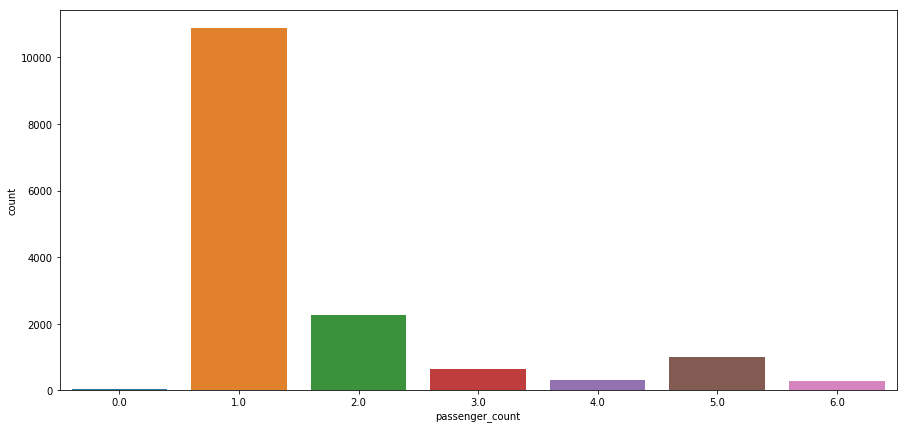

In [226]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

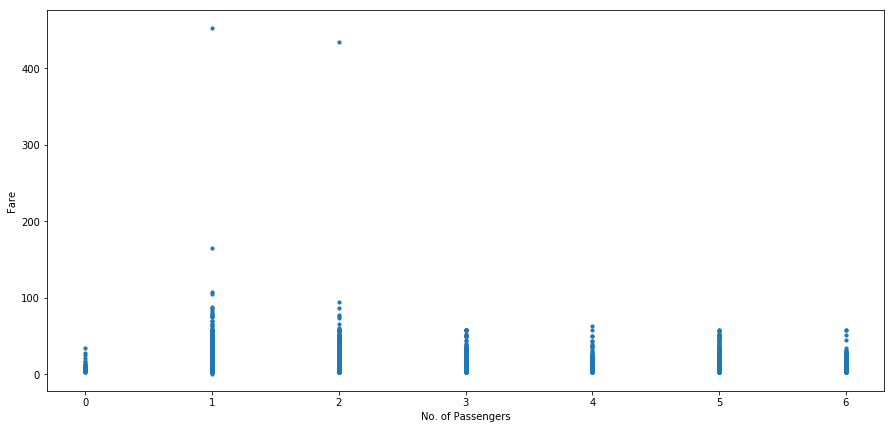

In [227]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

In [228]:
passenger_grp = train.groupby('passenger_count')
passenger_grp['fare_amount'].agg(['mean', 'count'])

,mean,count
passenger_count,,
0.0,9.275926,54
1.0,11.178971,10881
2.0,12.371261,2260
3.0,11.562595,655
4.0,11.339369,317
5.0,11.074370,1016
6.0,11.426429,294


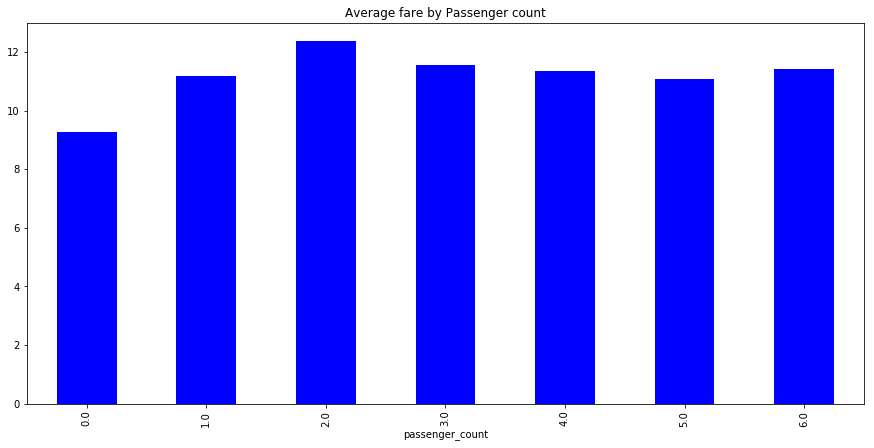

In [229]:
plt.figure(figsize=(15,7))
passenger_grp['fare_amount'].mean().plot.bar(color='b')
plt.title('Average fare by Passenger count')
plt.show()

In [230]:
# ### Observations :
#    By seeing the above plots we can easily conclude that:
# 1. single travelling passengers are most frequent travellers.
# 2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

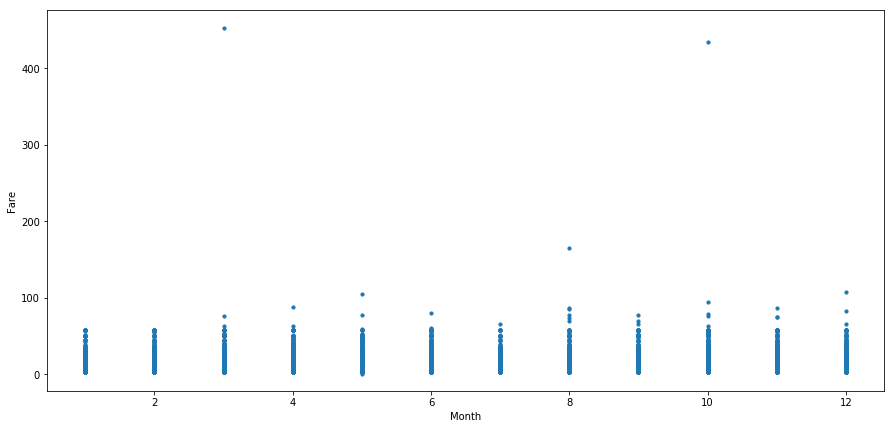

In [231]:
#Relationship between Month and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Month'], y=train['fare_amount'], s=10)
plt.xlabel('Month')
plt.ylabel('Fare')
plt.show()

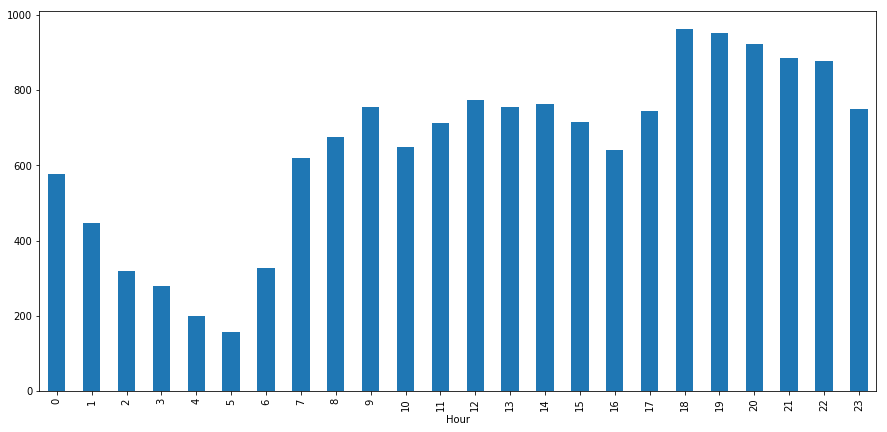

In [232]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

In [233]:
# Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

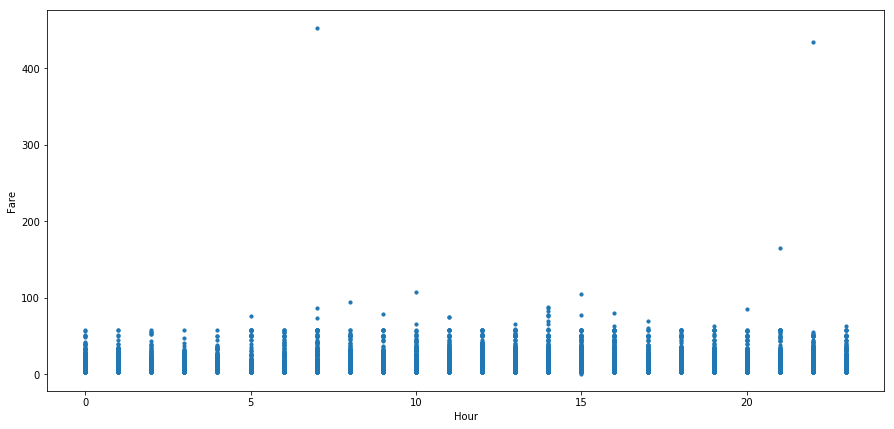

In [234]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

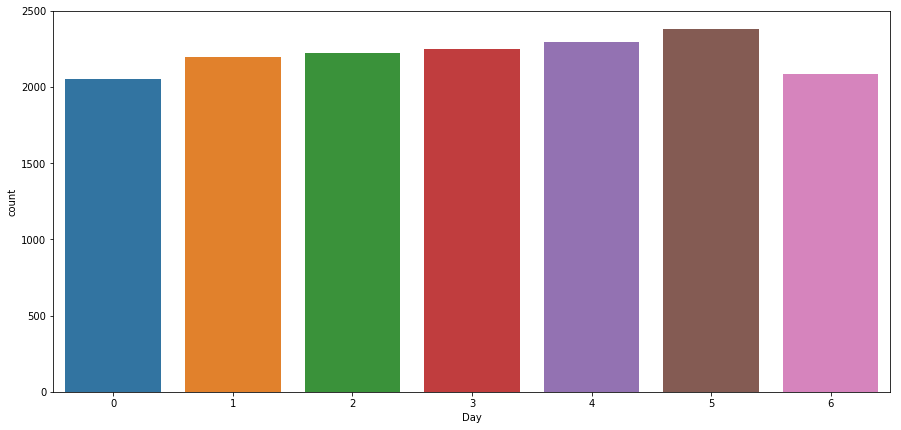

In [235]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

In [236]:
#Observation :
# The day of the week does not seem to have much influence on the number of cabs ride

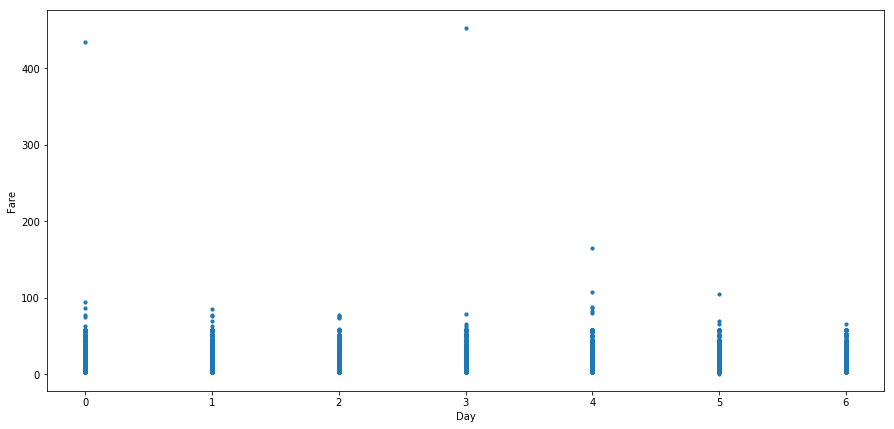

In [237]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

In [238]:
#The highest fares seem to be on a Sunday and Thursday, and the low on Wednesday and Saturday.
#May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

<function matplotlib.pyplot.show>

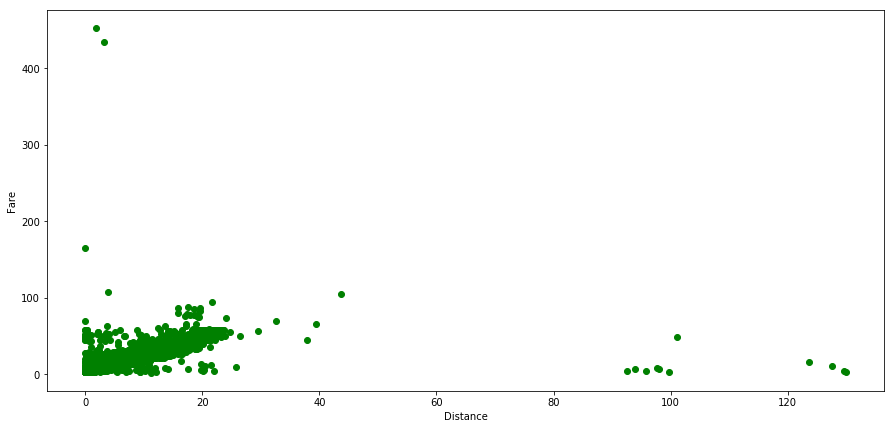

In [239]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show

In [240]:
#ML Algorithms

In [241]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [165]:
print(X_train.shape)
print(X_test.shape)
print(X_train.dtypes)
print(y_train.dtypes)

(12339, 7)
(3085, 7)
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object
float64


In [166]:
#Linear Regression Model

In [242]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

#prediction on train data
pred_train_LR = fit_LR.predict(X_train)
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

#calculate R^2 for train data
from sklearn.metrics import r2_score
print("R2 Score for training data = "+ str(r2_score(y_train, pred_train_LR)))
#calculate R^2 for test data
print("R2 Score for test data = "+ str(r2_score(y_test, pred_test_LR)))

Root Mean Squared Error For Training data = 7.70211683576
Root Mean Squared Error For Test data = 10.63213181
R2 Score for training data = 0.424251096975
R2 Score for test data = 0.276619131723


In [243]:
# ### Decision tree Model : 
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on train data
pred_train_DT = fit_DT.predict(X_train)
#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))
##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

## R^2 calculation for train data
print("R2 Score for training data = "+str(r2_score(y_train, pred_train_DT)))
## R^2 calculation for test data
print("R2 Score for test data = "+str(r2_score(y_test, pred_test_DT)))

Root Mean Squared Error For Training data = 6.20297779749
Root Mean Squared Error For Test data = 9.86080238295
R2 Score for training data = 0.626566420122
R2 Score for test data = 0.377770173565


In [244]:
# ### Random Forest Model :
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

## calculate R^2 for train data
print("R2 Score for training data = "+str(r2_score(y_train, pred_train_RF)))
#calculate R^2 for test data
print("R2 Score for test data = "+str(r2_score(y_test, pred_test_RF)))

Root Mean Squared Error For Training data = 2.24362717184
Root Mean Squared Error For Test data = 9.67448936905
R2 Score for training data = 0.951144406155
R2 Score for test data = 0.401061241777


In [245]:
# ### Gradient Boosting :
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

#prediction on train data
pred_train_GB = fit_GB.predict(X_train)
#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

#calculate R^2 for test data
print("R2 Score for training data = "+str(r2_score(y_test, pred_test_GB)))
#calculate R^2 for train data
print("R2 Score for test data = "+str(r2_score(y_train, pred_train_GB)))

Root Mean Squared Error For Training data = 4.55654327192
Root Mean Squared Error For Test data = 9.54411588474
R2 Score for training data = 0.417095078377
R2 Score for test data = 0.79849588821


In [249]:
# # Optimizing the results with parameters tuning :
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [250]:
##Random Search CV on Random Forest Model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,'max_depth': depth}
randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)
view_best_params_RRF = randomcv_rf.best_params_
best_model = randomcv_rf.best_estimator_
predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)

#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))



print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.38
RMSE =  9.82967277793


In [251]:
##Random Search CV on gradient boosting model
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,'max_depth': depth}
randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)
view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_
predictions_gb = best_model.predict(X_test)



#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))



print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.29
RMSE =  10.5698971667


In [252]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)

#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 13}
R-squared = 0.41
RMSE =  9.56974715476


In [253]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.41
RMSE =  9.56941627213


In [254]:
# # Prediction of fare from provided test dataset :

# We have already cleaned and processed our test dataset along with our training dataset. 
#Hence we will be predicting using grid search CV for random forest model


In [255]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [256]:
predictions_GRF_test_Df

array([  9.01252264,   9.33080234,   5.66919122, ...,  54.5584783 ,
        24.26406131,   5.66919122])

In [257]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [258]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323259,9.012523
1,1,2015,1,27,1,13,2.425353,9.330802
2,1,2011,10,8,5,11,0.618628,5.669191
3,1,2012,12,1,5,21,1.961033,8.274870
4,1,2012,12,1,5,21,5.387301,14.414245


In [259]:
test.to_csv('test_df.csv')